# Statistical learning (MATH-412) - Week 1 
## Exercise 1.2

In [1]:
import os
import numpy as np
import utils as utils
import matplotlib.pyplot as plt

1. Import "simreg1_train.csv" and "simreg1_test.csv"

In [2]:
# File used in the exercise
reg_train_file = os.path.join(os.getcwd(), 'data', 'simreg1_train.csv')
reg_test_file = os.path.join(os.getcwd(), 'data', 'simreg1_test.csv')

# Load the csv files
reg_train = np.genfromtxt(reg_train_file, delimiter=';')
reg_test = np.genfromtxt(reg_test_file, delimiter=';')
x_train = reg_train[1:,0]
y_train = reg_train[1:,1]
x_test = reg_test[1:,0]
y_test = reg_test[1:,1]

1. Compute the least squares estimates for "simreg1_train.csv" and plot the fitted values

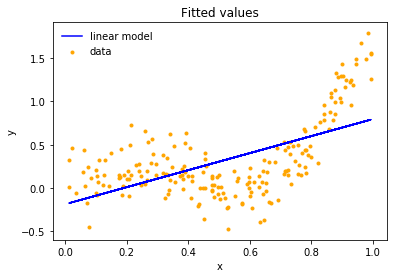

In [3]:
# Linear model
x_train_reg = np.transpose([np.ones(np.shape(x_train)), x_train])

# Fit the linear model to the data
beta_train = utils.compute_my_ls_estimate(x_train_reg, y_train)

# Fitted values
y_train_pred = np.matmul(x_train_reg, beta_train)

# Plot the fitted values
plt.figure()
plt.scatter(x_train,y_train, color='orange', marker='.', linewidth=1, label='data')
plt.plot(x_train, y_train_pred, color='blue', label='linear model')
plt.title('Fitted values')
plt.legend(loc='upper left', frameon=False)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

1. Calculate the training error for this dataset using the squared loss

In [4]:
training_error = utils.compute_l2_error(y_train, y_train_pred)
print(training_error)

0.13401949523


1. For the same loss function, calculate the empirical test error for the test dataset

In [6]:
# Linear model
x_test_reg = np.transpose([np.ones(np.shape(x_test)), x_test])

# Fitted values
y_test_pred = np.matmul(x_test_reg, beta_train)

# Empirical test error
test_error = utils.compute_l2_error(y_test, y_test_pred)
print(test_error)

0.133766967259


1. We will make the model more flexible by adding features to the design matrix X.
Add the feature x^2 into your regression model. What happens to the training and test errors now?

In [7]:
# Quadratic model 
x_train_reg = np.transpose([np.ones(np.shape(x_train)), x_train, x_train**2])
x_test_reg = np.transpose([np.ones(np.shape(x_test)), x_test, x_test**2])

# Fit the linear model to the data
beta_train = utils.compute_my_ls_estimate(x_train_reg, y_train)

# Fitted values
y_train_pred = np.matmul(x_train_reg, beta_train)
y_test_pred = np.matmul(x_test_reg, beta_train)

# Losses
training_error = utils.compute_l2_error(y_train, y_train_pred)
print(training_error)
test_error = utils.compute_l2_error(y_test, y_test_pred)
print(test_error)

0.066195454128
0.0659857881544


1. Add features up to x^k into your regression model, for k = 3, 4, . . . , 10. Calculate the training and test errors for each k = 1, . . . , 10. Make a plot of the training and test
errors against k. Discuss. What happens when k > 10?

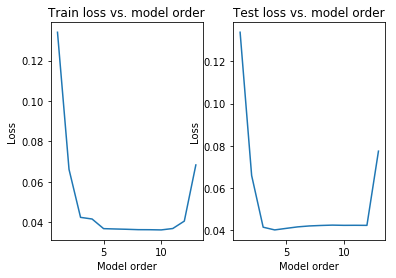

In [14]:
# Output variables
y_train_pred = []
y_test_pred = []
x_train_reg_list = [np.ones(np.shape(x_train))]
x_test_reg_list = [np.ones(np.shape(x_test))]
train_loss = []
test_loss = []

# List of model orders
list_model_orders = range(1,14)

# Loop over the orders of the regrssion model
for k in list_model_orders:
    # Build the regression model
    x_train_reg_list.append(x_train**k)
    x_test_reg_list.append(x_test**k)
    x_train_reg = np.asarray(x_train_reg_list)
    x_test_reg = np.asarray(x_test_reg_list)

    # Compute the LS estimate
    beta_train = utils.compute_my_ls_estimate(np.transpose(x_train_reg), y_train)

    # Compute the prediction
    y_train_pred.append(np.matmul(np.transpose(x_train_reg),beta_train))
    y_test_pred.append(np.matmul(np.transpose(x_test_reg),beta_train))

    # Calculate the training error
    train_loss.append(utils.compute_l2_error(y_train, y_train_pred[k-1]))

    # Empirical test error on the test set
    test_loss.append(utils.compute_l2_error(y_test, y_test_pred[k-1]))

# Plots
plt.figure()
plt.subplot(121)
plt.plot(list_model_orders, train_loss)
plt.ylabel('Loss')
plt.xlabel('Model order')
plt.title('Train loss vs. model order')

plt.subplot(122)
plt.plot(list_model_orders, test_loss)
plt.ylabel('Loss')
plt.xlabel('Model order')
plt.title('Test loss vs. model order')
plt.show()